<a href="https://colab.research.google.com/github/ps11061601/CCProject/blob/master/KNN%2C_KMeans%2C_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('preprocessed_1.csv')

In [2]:
df.head()

,Unnamed: 0,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,365
1,1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,2,Manhattan,40.80902,-73.94190,Private room,150,3,0,365
3,3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0


In [0]:
df = pd.get_dummies(df)

In [5]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,355,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,365,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0,0,0,1,0,0,1,0,0


In [0]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.2)

x_train = train.drop('price', axis=1)
y_train = train['price']

x_test = test.drop('price', axis = 1)
y_test = test['price']

In [7]:

# Scaling the training and testing data
scaler = StandardScaler(copy= True, with_mean= True, with_std= True)
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_train_scaled.head()

,latitude,longitude,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.149202,-0.594765,-0.250353,-0.523638,-0.856100,-0.151971,-0.834076,1.122902,-0.363758,-0.089813,0.959899,-0.914802,-0.15666
1,-0.792736,0.681018,-0.250353,-0.500972,-0.582552,-0.151971,1.198932,-0.890549,-0.363758,-0.089813,0.959899,-0.914802,-0.15666
2,0.265125,-0.623221,-0.199787,-0.523638,-0.856100,-0.151971,-0.834076,1.122902,-0.363758,-0.089813,-1.041776,1.093132,-0.15666
3,0.791037,-0.090962,1.165518,-0.455639,1.697014,-0.151971,-0.834076,1.122902,-0.363758,-0.089813,0.959899,-0.914802,-0.15666
4,-1.033832,-0.162318,-0.300920,0.133681,0.169705,-0.151971,1.198932,-0.890549,-0.363758,-0.089813,0.959899,-0.914802,-0.15666


In [8]:

x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)
x_test_scaled.head()

,latitude,longitude,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.322359,-0.210846,7.437311,-0.518362,1.911782,-0.147419,1.187854,-0.896982,-0.355097,-0.078571,0.967498,-0.924224,-0.152762
1,0.125829,1.104350,-0.187212,-0.366944,-0.859929,-0.147419,-0.841855,-0.896982,2.816131,-0.078571,0.967498,-0.924224,-0.152762
2,-0.167652,-0.702690,-0.101059,-0.518362,-0.859929,-0.147419,-0.841855,1.114850,-0.355097,-0.078571,-1.033594,1.081989,-0.152762
3,0.941979,0.038172,-0.273365,-0.518362,-0.859929,-0.147419,-0.841855,1.114850,-0.355097,-0.078571,0.967498,-0.924224,-0.152762
4,0.901774,0.059845,-0.187212,2.163912,1.000535,-0.147419,-0.841855,1.114850,-0.355097,-0.078571,0.967498,-0.924224,-0.152762


In [9]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 1) 
  
knn.fit(x_train_scaled, y_train) 
pred = knn.predict(x_test_scaled) 
  
# Predictions and Evaluations 
# Let's evaluate our KNN model !  
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, pred)) 
  
print(classification_report(y_test, pred)) 

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         9
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          25       0.29      0.38      0.32        16
          26       0.00      0.00      0.00         4
          27       0.00      0.00      0.00         4
          28   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Error Rate')

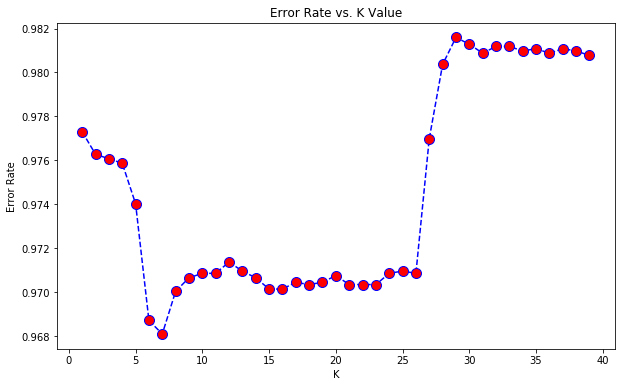

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
error_rate = [] 
  
# Will take some time 
for i in range(1, 40): 
      
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(x_train_scaled, y_train) 
    pred_i = knn.predict(x_test) 
    error_rate.append(np.mean(pred_i != y_test)) 
  
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 40), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate') 

In [20]:

  
  
# NOW WITH K = 7
knn = KNeighborsClassifier(n_neighbors = 7) 
  
knn.fit(x_train_scaled, y_train) 
pred = knn.predict(x_test) 
  
print('WITH K = 7') 
print('\n') 
print(confusion_matrix(y_test, pred)) 
print('\n') 
print(classification_report(y_test, pred)) 

WITH K = 7


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         9
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00        16
          26       0.00      0.00      0.00         4
          27       0.00      0.00      0.00         4
          28       0.00      0.00      0.00        12


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.metrics import mean_squared_error
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(x_train_scaled,y_train)
train_predict_KNN = knn.predict(x_train_scaled)
print('RMSE train for KNN: ',np.sqrt(mean_squared_error(train_predict_KNN,y_train)))
test_predict_KNN = knn.predict(x_test_scaled)
print('RMSE test for KNN : ', np.sqrt(mean_squared_error(test_predict_KNN,y_test)))

RMSE train for KNN:  240.8572986048717
RMSE test for KNN :  220.10651768801685


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,26)
scores={}
scores_list= []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train_scaled, y_train)
        y_pred=knn.predict(x_test)
        scores[k] = metrics.accuracy_score(y_test, y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [0]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

[[ 4.07289116e+01 -7.39504744e+01  1.89039550e+02  1.06995025e+01
   3.40267150e+01  2.80688202e+02  2.91715286e-02  3.53436099e-01
   4.67849905e-01  1.36461340e-01  1.30811276e-02  5.59847694e-01
   4.08892710e-01  3.12595959e-02]
 [ 4.07289475e+01 -7.39529616e+01  1.24077093e+02  5.15117423e+00
   1.79419648e+01  2.85494897e+01  1.89044633e-02  4.40550842e-01
   4.29884421e-01  1.05772778e-01  4.88749539e-03  4.98801180e-01
   4.81187754e-01  2.00110660e-02]
 [ 4.07370896e+01 -7.39751236e+01  4.40838750e+03  2.41500000e+01
   3.25000000e+00  1.90312500e+02  1.25000000e-02  2.12500000e-01
   7.25000000e-01  3.75000000e-02  1.25000000e-02  8.25000000e-01
   1.75000000e-01 -2.77555756e-17]]


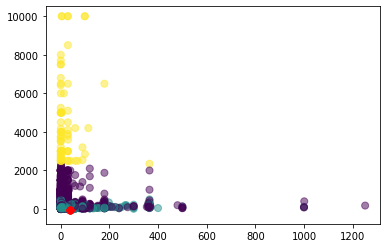

In [14]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['minimum_nights'], df['price'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

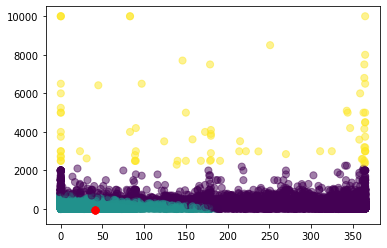

In [15]:
plt.scatter(df['availability_365'], df['price'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

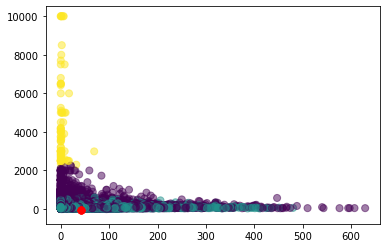

In [16]:
plt.scatter(df['number_of_reviews'], df['price'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

Helpful link: https://datatofish.com/k-means-clustering-python/

In [26]:
kmeans= KMeans(n_clusters=3)
kmeans.fit(x_train_scaled,y_train)
train_predict_kmeans = kmeans.predict(x_train_scaled)
print('RMSE train for Kmeans: ',np.sqrt(mean_squared_error(train_predict_kmeans,y_train)))
test_predict_kmeans = kmeans.predict(x_test_scaled)
print('RMSE test for Kmeans: ', np.sqrt(mean_squared_error(test_predict_kmeans,y_test)))

RMSE train for Kmeans:  287.65928345031523
RMSE test for Kmeans:  268.5536480244992


In [17]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = gnb.predict(x_test_scaled)

In [19]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 0.020451988955925964


In [27]:
gnb= GaussianNB()
gnb.fit(x_train_scaled,y_train)
train_predict_gnb = gnb.predict(x_train_scaled)
print('RMSE train for GNB: ',np.sqrt(mean_squared_error(train_predict_gnb,y_train)))
test_predict_gnb = gnb.predict(x_test_scaled)
print('RMSE test for GNB: ', np.sqrt(mean_squared_error(test_predict_gnb,y_test)))

RMSE train for GNB:  2345.816621458374
RMSE test for GNB:  213.8452307104775
